In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Hotel System/'
df = pd.read_csv(path + 'hotel_train.csv')
df_test = pd.read_csv(path + 'hotel_test.csv')

print(f'Train shape: {df.shape}')
print(f'Test shape: {df_test.shape}')

Train shape: (65229, 25)
Test shape: (32412, 25)


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
print(df.head())

   id  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0   0            0        7.0               2015               July   
1   1            0       14.0               2015               July   
2   2            0        0.0               2015               July   
3   3            0        9.0               2015               July   
4   4            1       85.0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1     1.0       0.0     0.0   
1                        0                     2     2.0       0.0  

Somebody has 10 babies with him/her. And somebody cancelled 26 reservations in the past.

In [5]:
df.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


Seems like perfect data for me

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

Lets clean guests with more than 5 babys. Otherwise it will be an Anomaly.

In [7]:
df[df['babies'] > 5]

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
22995,30935,0,37.0,2016,January,3,12,0,2,2.0,0.0,10.0,BB,PRT,TA/TO,0,0,0,D,1,0,Transient,0,1,2
41528,59925,0,11.0,2015,October,42,11,2,1,1.0,0.0,9.0,BB,GBR,Corporate,0,0,0,A,1,0,Transient-Party,0,0,3


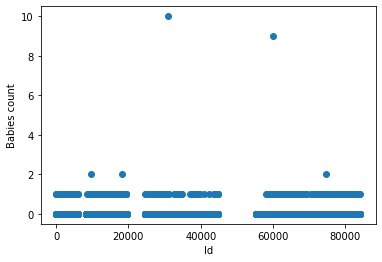

In [8]:
plt.scatter(df['id'], df['babies'])
plt.xlabel('Id')
plt.ylabel('Babies count')
plt.show()

In [9]:
df = df.loc[df['babies'] < 3, :]

Let's observe count of previous cancellations

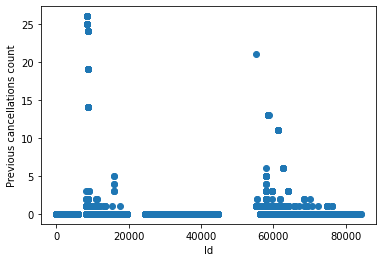

In [10]:
plt.scatter(df['id'], df['previous_cancellations'])
plt.xlabel('Id')
plt.ylabel('Previous cancellations count')
plt.show()

Which country has the most cancellations?

In [11]:
country_cnt = df.groupby('country')['is_canceled'].sum()
country_cnt = country_cnt[country_cnt > 0].sort_values(ascending=False)
country_cnt = country_cnt[:15]
country_cnt

country
PRT    16604
ESP     1081
GBR      938
FRA      876
ITA      767
DEU      541
BRA      349
IRL      313
CHN      234
BEL      208
USA      192
NLD      189
CHE      161
SWE      114
POL      105
Name: is_canceled, dtype: int64

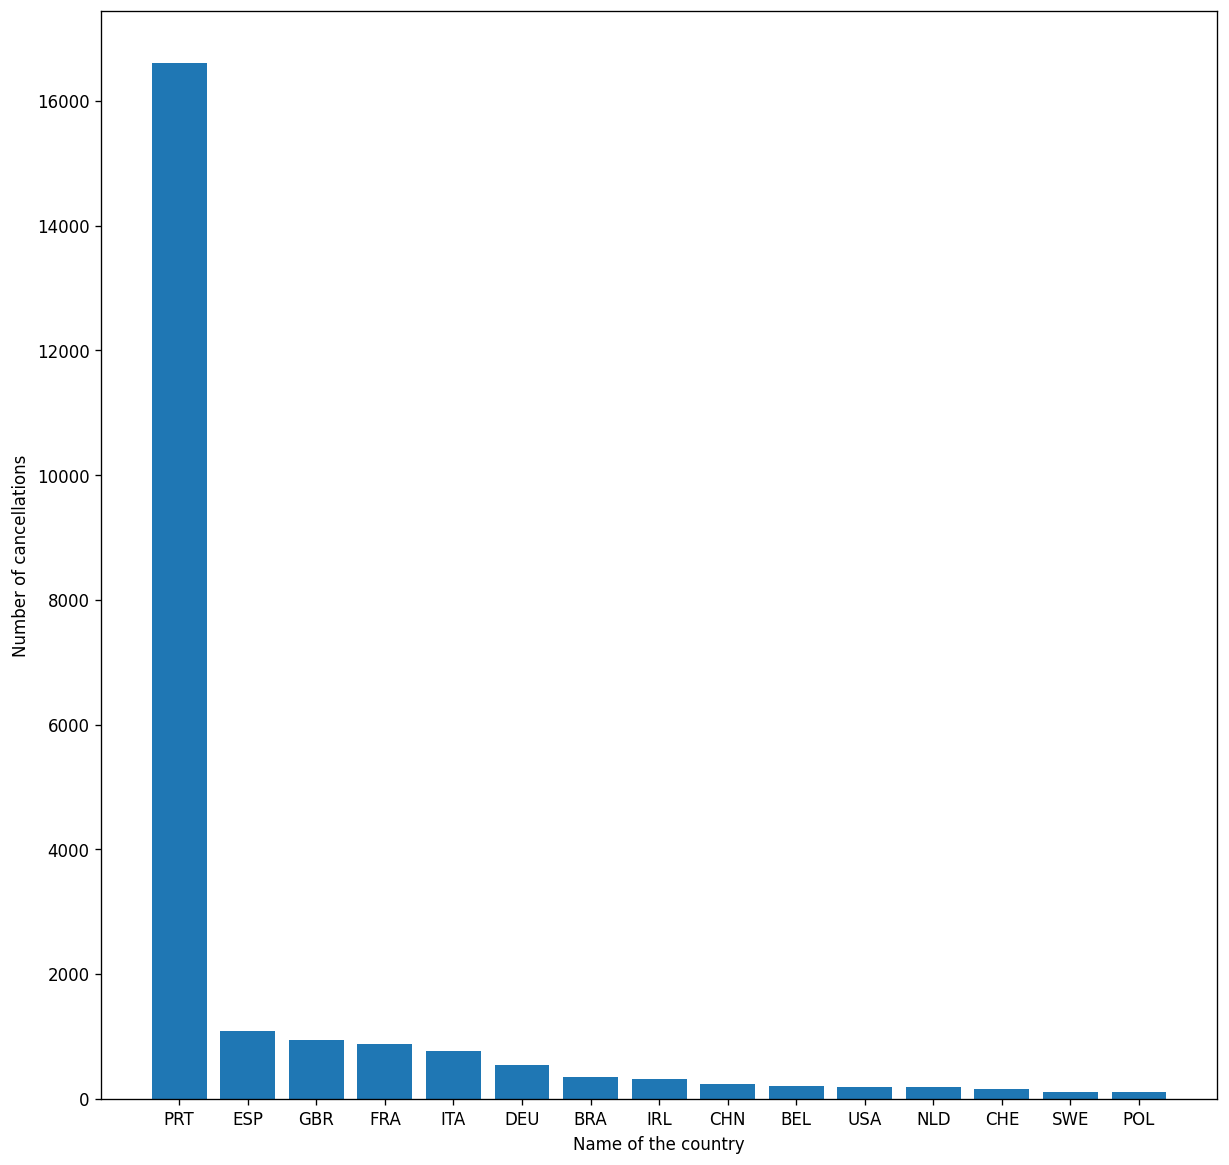

In [12]:
fig = plt.figure(figsize=(12, 12), dpi=120)
ax = fig.add_subplot(111)
ax.bar(x=country_cnt.index.values, height=country_cnt.values)
plt.xlabel('Name of the country')
plt.ylabel('Number of cancellations')
plt.show()

Label encoding

There was an error during test preprocessing (encoder met unseen categories, therefore I found this solution helpful:

https://stackoverflow.com/a/65538195/14715428

In [13]:
from sklearn.preprocessing import OrdinalEncoder


enc_cols = ['arrival_date_month',
            'reserved_room_type',
            'meal',
            'country',
            'distribution_channel',
            'customer_type']

for col in enc_cols:
    # Create encoder
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                             unknown_value=-1)
    # reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
    X = encoder.fit_transform(df[col].values.reshape(-1,1))
    X_test = encoder.transform(df_test[col].values.reshape(-1,1))

    # add this back into the original dataframe 
    encoded = pd.DataFrame(X, columns=[col + "_enc"])
    df = pd.concat([df, encoded], axis=1)

    encoded = pd.DataFrame(X_test, columns=[col + "_enc"])
    df_test = pd.concat([df_test, encoded], axis=1)

    df = df.drop([col], axis=1)
    df_test = df_test.drop([col], axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65227 non-null  float64
 1   is_canceled                     65227 non-null  float64
 2   lead_time                       65227 non-null  float64
 3   arrival_date_year               65227 non-null  float64
 4   arrival_date_week_number        65227 non-null  float64
 5   arrival_date_day_of_month       65227 non-null  float64
 6   stays_in_weekend_nights         65227 non-null  float64
 7   stays_in_week_nights            65227 non-null  float64
 8   adults                          65227 non-null  float64
 9   children                        65227 non-null  float64
 10  babies                          65227 non-null  float64
 11  is_repeated_guest               65227 non-null  float64
 12  previous_cancellations          

## Model

In [14]:
# X, y split

X = df.drop(['is_canceled', 'id'], axis=1)
y = df['is_canceled'].values.astype('bool')
X_test = df_test.drop(['is_canceled', 'id'], axis=1)
y_test = df_test['is_canceled'].values.astype('bool')

In [15]:
from sklearn.model_selection import train_test_split

# Validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3,
                                                      shuffle=True,
                                                      random_state=13)

# y_train, y_valid = y_train.values.astype('bool'), y_valid.values.astype('bool')

In [16]:
import xgboost as xgb

eval_set = [(X_train, y_train), (X_valid, y_valid)]
xgbr = xgb.XGBClassifier(eta=0.0001,
                         max_depth=5,
                         colsample_bytree=0.9,
                         min_child_weight=5,
                         gamma=1.5,
                         objective='binary:logistic',
                         tree_method='gpu_hist',
                         random_state=13,
                         verbosity=2)

In [17]:
xgbr.fit(X_train, y_train,
         eval_metric=['logloss', 'logloss'], eval_set=eval_set,
         early_stopping_rounds=400, verbose=2)

[0]	validation_0-logloss:0.650637	validation_1-logloss:0.651801
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 400 rounds.
[2]	validation_0-logloss:0.587974	validation_1-logloss:0.5907
[4]	validation_0-logloss:0.542741	validation_1-logloss:0.546593
[6]	validation_0-logloss:0.509697	validation_1-logloss:0.514693
[8]	validation_0-logloss:0.483495	validation_1-logloss:0.489428
[10]	validation_0-logloss:0.461824	validation_1-logloss:0.468392
[12]	validation_0-logloss:0.444716	validation_1-logloss:0.451717
[14]	validation_0-logloss:0.431349	validation_1-logloss:0.438852
[16]	validation_0-logloss:0.419796	validation_1-logloss:0.427704
[18]	validation_0-logloss:0.411304	validation_1-logloss:0.419446
[20]	validation_0-logloss:0.403035	validation_1-logloss:0.411795
[22]	validation_0-logloss:0.394715	validation_1-logloss:0.404018
[24]	validation_0-logloss:0.389282	validation_1-logloss:0.398

XGBClassifier(colsample_bytree=0.9, eta=0.0001, gamma=1.5, max_depth=5,
              min_child_weight=5, random_state=13, tree_method='gpu_hist',
              verbosity=2)

In [18]:
from sklearn.metrics import roc_curve, auc, accuracy_score

# calculate the fpr and tpr for all thresholds of the binary classification
probs = xgbr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

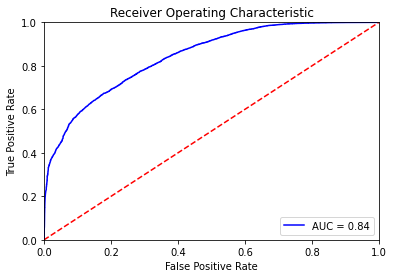

In [19]:
# plot

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
y_train_pred = xgbr.predict(X_train)
score = accuracy_score(y_train, y_train_pred)
print(score)

0.857993867717915


In [21]:
y_valid_pred = xgbr.predict(X_valid)
score = accuracy_score(y_valid, y_valid_pred)
print(score)

0.8477183300117532


In [22]:
y_pred = xgbr.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.7720597309638405


In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

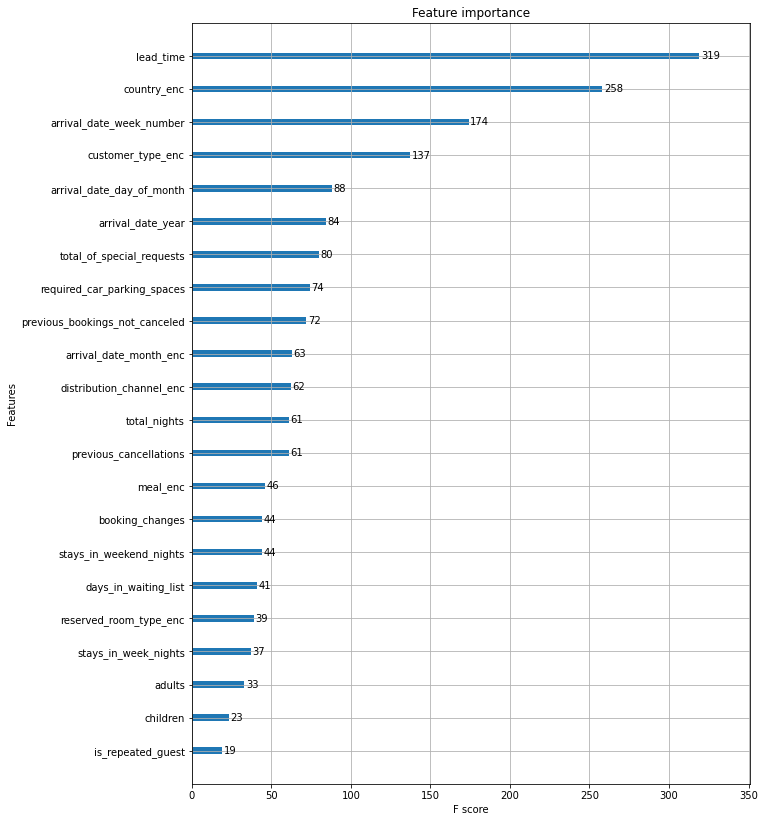

In [24]:
plot_features(xgbr, (10, 14))